In [1]:
from umpyre.data.scraper import BaseballReferenceScraper
import pandas as pd

## Load up free agency data for 2015

In [2]:
# initialize scraper
scraper = BaseballReferenceScraper()

In [97]:
url = "http://www.baseball-reference.com/leagues/MLB/2015-free-agents.shtml"
data = scraper.data_from_url(url, 'fa_signings')

## what type of data was returned?
data.keys()

['fa_signings']

In [98]:
signings = data['fa_signings']

In [101]:
signings.columns

Index([       u'Rk',      u'Name',      u'Date',   u'To Team', u'From Team',
             u'Age',      u'WAR3',       u'Yrs',         u'G',        u'AB',
               u'R',         u'H',        u'HR',       u'RBI',        u'SB',
              u'BB',        u'BA',       u'OBP',       u'SLG',       u'OPS',
               u'W',         u'L',       u'ERA',      u'WHIP',       u'G_1',
              u'GS',        u'SV',        u'IP',       u'H_1',      u'HR_1',
            u'BB_1',        u'SO',       u'WAR'],
      dtype='object')

In [99]:
signings.head()

,Rk,Name,Date,To Team,From Team,Age,WAR3,Yrs,G,AB,...,ERA,WHIP,G_1,GS,SV,IP,H_1,HR_1,BB_1,SO
0,1,Tommy Hunter,2016-02-12,Cleveland Indians,CHC,29,3.0,8,284,3,...,4.31,1.272,284,75,16,676.2,710,104,151,423
1,2,Cory Luebke,2016-02-11,Pittsburgh Pirates,SDP,31,NaN,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Eric O'Flaherty,2016-02-11,Pittsburgh Pirates,NYM,31,-0.4,10,435,2,...,3.24,1.302,435,0,1,369.1,348,21,133,281
3,4,Travis Ishikawa,2016-02-09,Chicago White Sox,PIT,32,-0.7,8,488,944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Mat Latos,2016-02-09,Chicago White Sox,LAA,28,4.5,7,175,319,...,3.51,1.183,177,174,0,1068.1,949,100,315,959


### WAR3  $\rightarrow$ Expected WAR

In [100]:
# Convert WAR in last 3 years to avg WAR
signings['WAR'] = signings['WAR3']/3

## Let's look at the signings data

In [16]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Look at WAR for each team

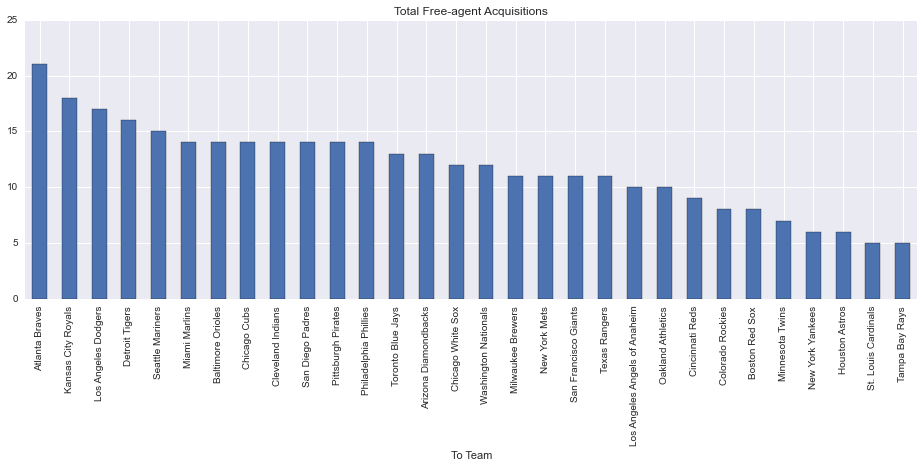

In [93]:
total_signings = signings.groupby('To Team')['Rk'].count()

total_signings.sort_values(ascending=False).plot(kind='bar', figsize=(16,5));
plt.title('Total Free-agent Acquisitions');

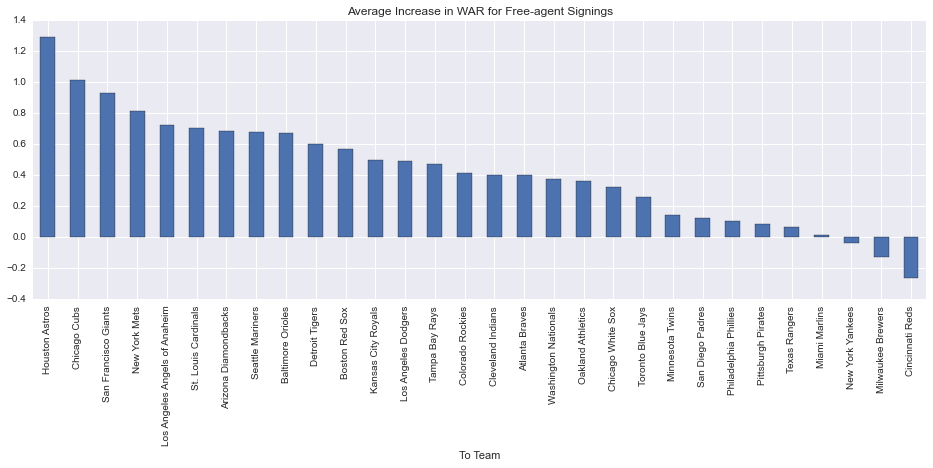

In [92]:
avg_war = signings.groupby('To Team')['WAR'].mean()

avg_war.sort_values(ascending=False).plot(kind='bar', figsize=(16,5));
plt.title('Average Increase in WAR for Free-agent Signings')

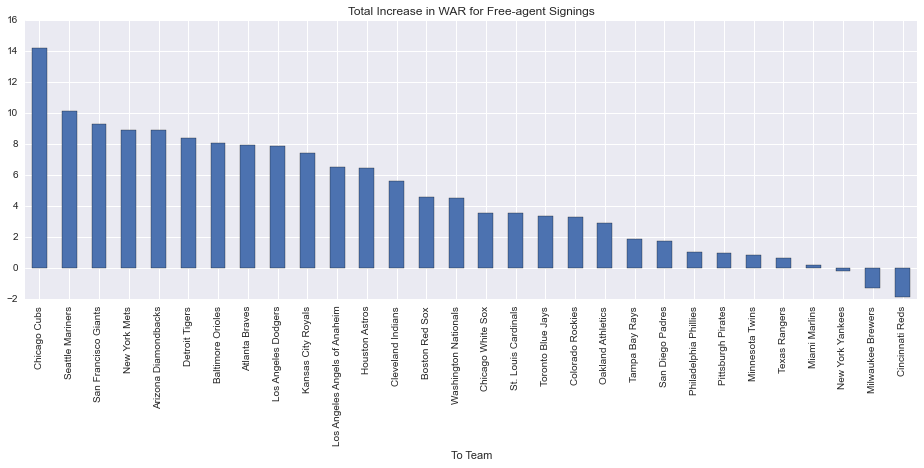

In [91]:
total_war = signings.groupby('To Team')['WAR'].sum()

total_war.sort_values(ascending=False).plot(kind='bar', figsize=(16,5));
plt.title('Total Increase in WAR for Free-agent Signings')

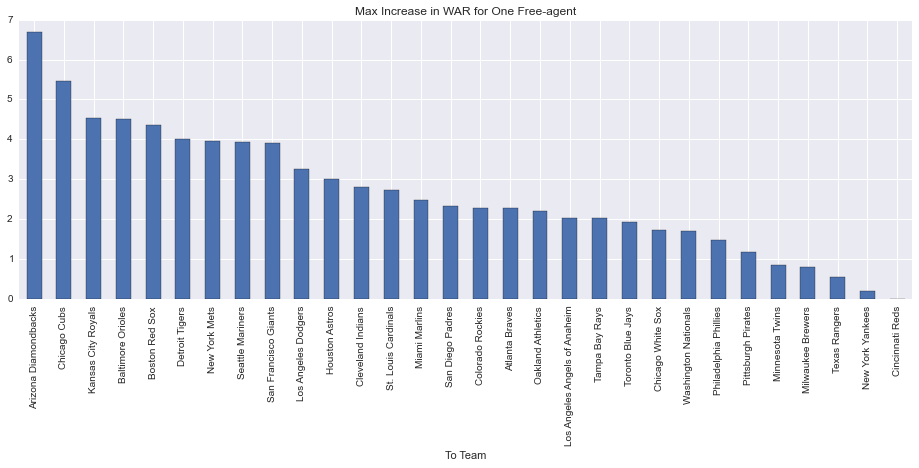

In [94]:
max_war = signings.groupby('To Team').max()['WAR']
max_war.sort_values(ascending=False).plot(kind='bar', figsize=(16,5));
plt.title('Max Increase in WAR for One Free-agent');

In [96]:
summary_data = pd.concat([total_signings, total_war, avg_war, max_war],axis=1)
summary_data.columns = ['Total Trades', 'Total WAR', 'Avg. WAR','Max WAR'];

## Each Team's Trade Efficiency

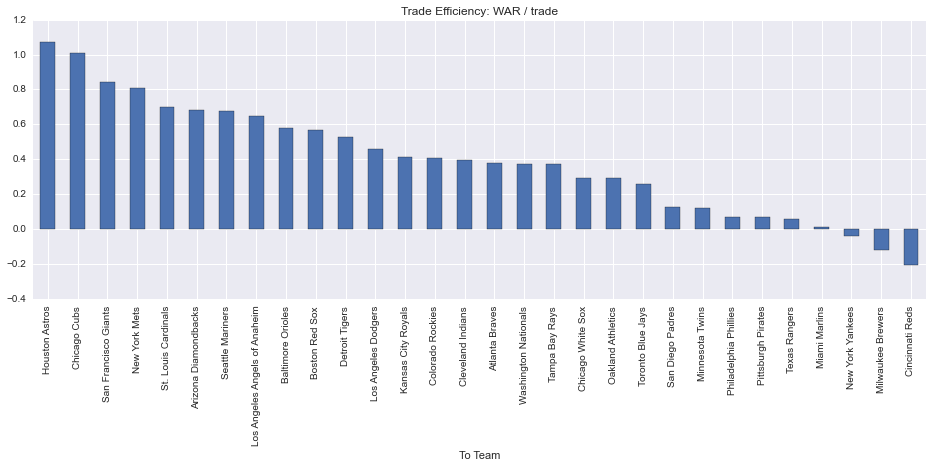

In [95]:
trade_efficiency = summary_data['Total WAR'] / summary_data['Total Trades']
trade_efficiency.sort_values(ascending=False).plot(kind='bar', figsize=(16,5));
plt.title('Trade Efficiency: WAR / trade');